In [1]:
import sklearn
from sklearn.datasets import make_circles

In [2]:
n_samples = 1000

X,y= make_circles(n_samples, noise=0.03,random_state=42)




In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X:{X[:5]}")

print(f"First 5 samples of y:{y[:5]}")

First 5 samples of X:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:[1 1 1 1 0]


In [5]:
# make dataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0], "X2": X[:,1], "label": y })
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


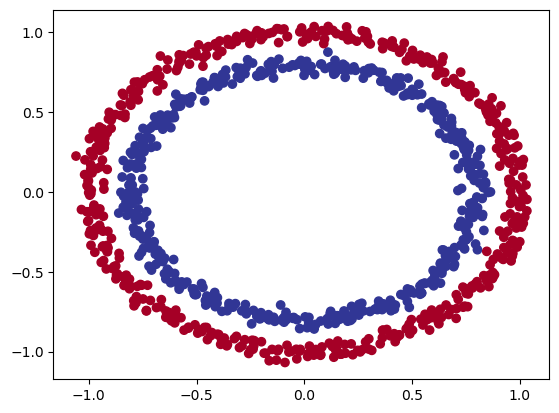

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x= X[:,0], y=X[:,1],c=y, cmap=plt.cm.RdYlBu)

Note: The data we're working with is often referred to as a toy dataset, a dataset that is amall enough to experiment but still sizeable enough to practice the fundamentals.

In [7]:
X.shape

(1000, 2)

In [8]:
y.shape

(1000,)

In [9]:
X_sample = X[0]
y_sample = y[0]

print(f"values for one sample of X: {X_sample} and the same of y:{y_sample} ")
print(f"shape X:{X_sample.shape} and y:{y_sample.shape} ")

values for one sample of X: [0.75424625 0.23148074] and the same of y:1 
shape X:(2,) and y:() 


In [10]:
# Turn data into tensors
import torch
torch.__version__

'1.14.0.dev20221118'

In [11]:
type(X)

numpy.ndarray

In [12]:
X.dtype

dtype('float64')

In [13]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [14]:
X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [18]:
n_samples

1000

# Building a model

Let's build a model to classify our blue and red dots

To do so, we want to :
1. Setup device agonistic code so our code will run on our accelerator (GPU) if there is one
2. Construct a model (by subclassing 'nn.Module')
3. Define a loss function and optimizer
4. Create a training and test loop


In [19]:
import torch
from torch import nn

device = "mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [20]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code , let's create a model that:

1. Subclasses 'nn.Module' ( almost all models in PyTorch subclass in 'nn.Module')
2. Create 2 'nn.Linear' layers that are capable of handling the shapes of our data
3. Defines a 'forward()' method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target device

In [21]:
# Construct a model that sbclasses nn.Module

# class CircleModelV0(nn.Module):
#     def __init__(self):
#         super().__init__()
#         # 2 create 2 nn.Linear layers capable of handling the shapes of our data
#         self.layer_1 = nn.Linear(in_features=2,out_features=5) # takes in 2 features and upscale to 5 features
#         self.layer_2 = nn.Linear(in_features=5,out_features=1) # takes in 5 features from previous layers and outputs a single layer(same shape as y)

#         # self.two_linear_layer = nn.Sequential(
#         #     nn.Linear(in_features=2,out_features=5),
#         #     nn.Linear(in_features=5,out_features=2)
#         # )

# # defina forward() method that outlines the forward pass
#     def forward(self,x):
#         return self.layer_2(self.layer_1(x))
#         # return two_linear_layer(x)

#     #4 instantiate an instance   of our model class and send it the target device

# model_0 = CircleModelV0().to(device)
# model_0

In [22]:
device

'mps'

In [23]:
# next(model_0.parameters()).device

In [24]:
# Let's replicate the model above us nn.Sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
model_0.state_dict()

/Users/sonuthapa/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1668759148226/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(


OrderedDict([('0.weight',
              tensor([[ 0.1356, -0.3716],
                      [ 0.3967, -0.0687],
                      [-0.1266, -0.1483],
                      [ 0.1356, -0.5252],
                      [-0.3116, -0.6364]], device='mps:0')),
             ('0.bias',
              tensor([ 0.6569, -0.6478,  0.3008, -0.5647,  0.2883], device='mps:0')),
             ('1.weight',
              tensor([[ 0.3580,  0.1867,  0.1752, -0.0024, -0.3020]], device='mps:0')),
             ('1.bias', tensor([-0.2337], device='mps:0'))])

In [26]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"length of predictions: {len(untrained_preds)}, Shape:{untrained_preds.shape} ")
print(f"length of test samples:{len(X_test)}, shape:{X_test.shape } ")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nfirst 10 labels:\n{y_test[:10]}")


length of predictions: 200, Shape:torch.Size([200, 1]) 
length of test samples:200, shape:torch.Size([200, 2]) 

First 10 predictions: 
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='mps:0')

first 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [27]:
X_test[:10],y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

# Setup loss function and optimizer

2.1 Setup loss function and optimizer

We've setup a loss (also called a criterion or cost function) and optimizer before in notebook 01.

But different problem types require different loss functions.

For example, for a regression problem (predicting a number) you might used mean absolute error (MAE) loss.

And for a binary classification problem (like ours), you'll often use binary cross entropy as the loss function.

However, the same optimizer function can often be used across different problem spaces.

For example, the stochastic gradient descent optimizer (SGD, torch.optim.SGD()) can be used for a range of problems, so can too the Adam optimizer (torch.optim.Adam()).




In [28]:
#setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn =nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [29]:
# Calculate accuracy - out of 100 examples what percentage does our model gets right?
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

# Train a model
To train our model, we're going to need to build a training loop

1. Forward pass
2. Calculate a loss
3. Optimizer zero grad
4. Loss backward(backpropagation)
5. Optimizer(gradient descent)

## Going from raw logits => prediction possibilities => prediction labels

our model outputs are going to be raw **logits**.

We can convert these **logits** into  prediction possibilites by passing them to some kind of activation function(e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the argmax().

In [30]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [31]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.2106],
        [-0.1288],
        [-0.2958],
        [-0.1871],
        [-0.0904]], device='mps:0')

In [32]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [33]:
# use the sigmoid activation function on our model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4475],
        [0.4678],
        [0.4266],
        [0.4534],
        [0.4774]], device='mps:0')

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_preds_probs` >= 0.5, `y=1` (class 1)
* `y_preds_probs` < 0.5, `y=0` (class 0 )

In [34]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

# in full (logits -> pred probs -> pred labels)
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(),y_preds_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='mps:0')


tensor([0., 0., 0., 0., 0.], device='mps:0')

In [35]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='mps:0')

In [36]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

Build a training and testing loop

In [37]:
torch.manual_seed(42)

#epochs
epochs = 100

# Put data to target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)


for epoch in range(epochs):
    model_0.train()


    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits => pred probs => pred labels


    #calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits,y_train))
    
    loss = loss_fn(y_logits,y_train) # nn.BCEWithLogitLoss expect few roy logistics input 

    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)



    optimizer.zero_grad()


    loss.backward()

    optimizer.step()
    

    model_0.eval()

    with torch.inference_mode():
        test_logits =model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))


        test_loss = loss_fn(test_logits,y_test)

        test_acc = accuracy_fn(y_true=y_test,y_pred = test_pred)


    if epoch % 10 == 0:
        print(f"Epoch:{epoch} | Loss:{loss:.5f}, Acc:{acc:.5f} | Test loss:{test_loss:.5f}, test_acc:{test_acc:.2f}% ")


Epoch:0 | Loss:0.69746, Acc:42.25000 | Test loss:0.69990, test_acc:43.50% 
Epoch:10 | Loss:0.69489, Acc:48.62500 | Test loss:0.69744, test_acc:48.00% 
Epoch:20 | Loss:0.69415, Acc:48.62500 | Test loss:0.69669, test_acc:51.50% 
Epoch:30 | Loss:0.69389, Acc:50.25000 | Test loss:0.69640, test_acc:49.50% 
Epoch:40 | Loss:0.69376, Acc:50.50000 | Test loss:0.69625, test_acc:48.50% 
Epoch:50 | Loss:0.69367, Acc:50.87500 | Test loss:0.69615, test_acc:49.00% 
Epoch:60 | Loss:0.69360, Acc:51.37500 | Test loss:0.69607, test_acc:48.50% 
Epoch:70 | Loss:0.69354, Acc:51.00000 | Test loss:0.69600, test_acc:48.50% 
Epoch:80 | Loss:0.69348, Acc:51.00000 | Test loss:0.69594, test_acc:49.00% 
Epoch:90 | Loss:0.69344, Acc:51.25000 | Test loss:0.69588, test_acc:48.00% 


# Make predictions and evaluate the model

from the metrics it looks like our model isn't learning anything

so to inspect it let's make some predictinos and make them visual!!

In other words, "Visualize,isualize,visualize"

To do so, we're going to import a function called `plot_decision_boundary`


In [38]:
import requests
from pathlib import Path

# Download helper functions from Learn Pytorch repo (if it's not downloaded

request = "../Pytorch/helper_functios.py"

In [39]:
from helper_functios import plot_predictions,plot_decision_boundary

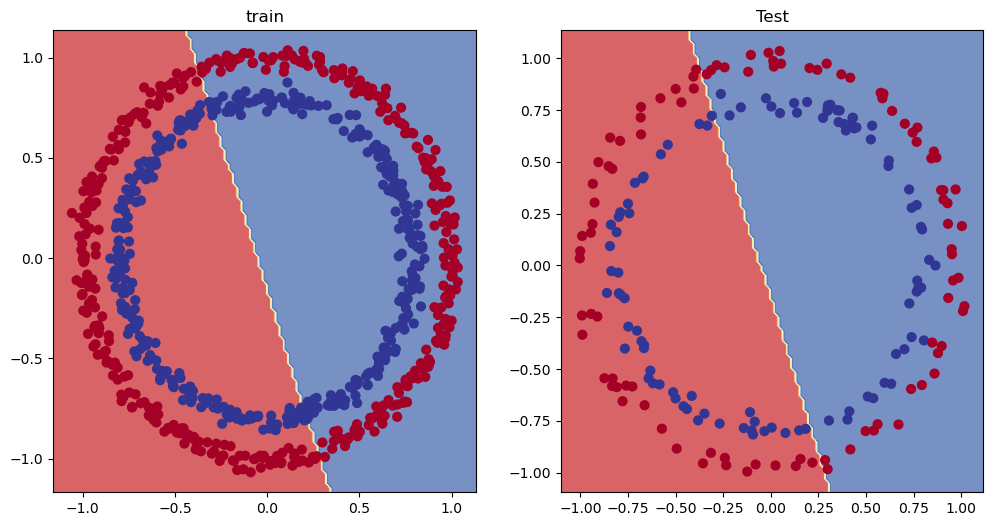

In [40]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

### 5. Improving a model (from a model perspective)
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
*  Fit for longer
* Changing the activation functions
* change the learning rate
* change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we ( as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**

Let's try and improve our model by:
* Adding more hidden units: 5 => 10
* Increase the number of layers: 2=>
* Increase the number of epochs 100 => 1000

In [41]:
X_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]], device='mps:0')

In [42]:
y_train[:5]

tensor([1., 0., 0., 0., 1.], device='mps:0')

In [43]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)

    def forward(self,x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # or
        return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed up where possible behind the scenes


model_1 = CircleModelV1().to(device)
model_1
        

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [44]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='mps:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='mps:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222,

In [45]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# create a optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [46]:
#write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.backends.mps.torch.manual_seed(42)


epochs = 1000


X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))


    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)


    optimizer.zero_grad()


    loss.backward()


    optimizer.step()


    model_1.eval()

    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)


    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)


    if epoch % 100 == 0:
        print(f"Epcoh:{epoch} | loss:{loss:5f},Acc:{acc:.2f}% | Test loss:{test_loss}, Test acc:{test_acc:.2f}")
        

Epcoh:0 | loss:0.693955,Acc:50.88% | Test loss:0.6926106214523315, Test acc:51.00
Epcoh:100 | loss:0.693690,Acc:50.25% | Test loss:0.6926932334899902, Test acc:50.00
Epcoh:200 | loss:0.693515,Acc:50.12% | Test loss:0.6928169131278992, Test acc:49.50
Epcoh:300 | loss:0.693388,Acc:50.50% | Test loss:0.6929518580436707, Test acc:49.00
Epcoh:400 | loss:0.693294,Acc:50.38% | Test loss:0.6930879950523376, Test acc:48.50
Epcoh:500 | loss:0.693222,Acc:49.88% | Test loss:0.6932205557823181, Test acc:49.50
Epcoh:600 | loss:0.693168,Acc:49.50% | Test loss:0.6933472752571106, Test acc:53.00
Epcoh:700 | loss:0.693125,Acc:49.38% | Test loss:0.69346684217453, Test acc:50.50
Epcoh:800 | loss:0.693093,Acc:50.00% | Test loss:0.6935784816741943, Test acc:51.00
Epcoh:900 | loss:0.693068,Acc:50.62% | Test loss:0.693682074546814, Test acc:47.50


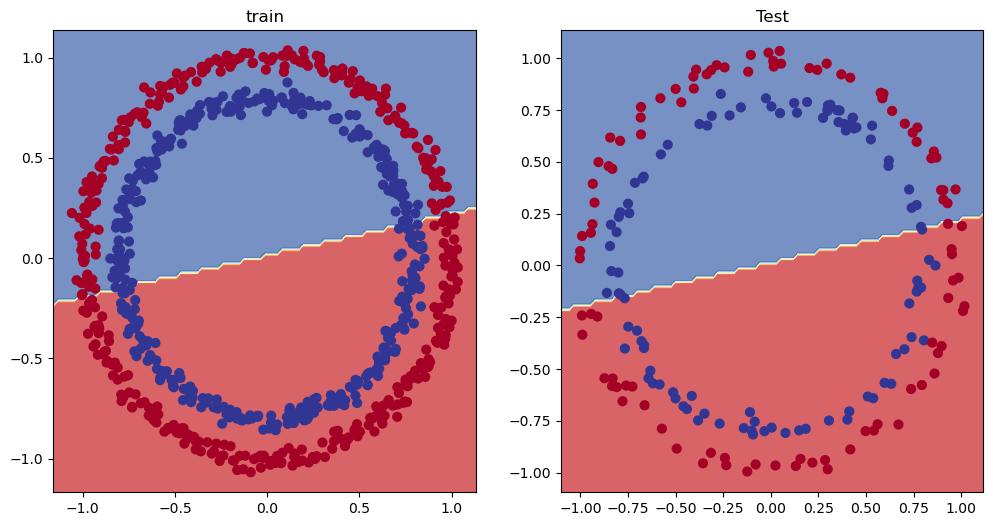

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")   
plot_decision_boundary(model_1,X_test,y_test)

### 5.1 Preparing data to see if our mocel can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [48]:
# create some data (same as notebook 01)

weight = 0.7
bias = 0.3
start = 0
end = 1

step = 0.01

# create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear Regression formula (without epilson)

# check the data
print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [49]:
# create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression,y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression = X_regression[train_split:],y_regression[train_split:]

# Check the lengths of each
len(X_train_regression),len(X_test_regression),len(y_train_regression),len(y_test_regression)

(80, 20, 80, 20)

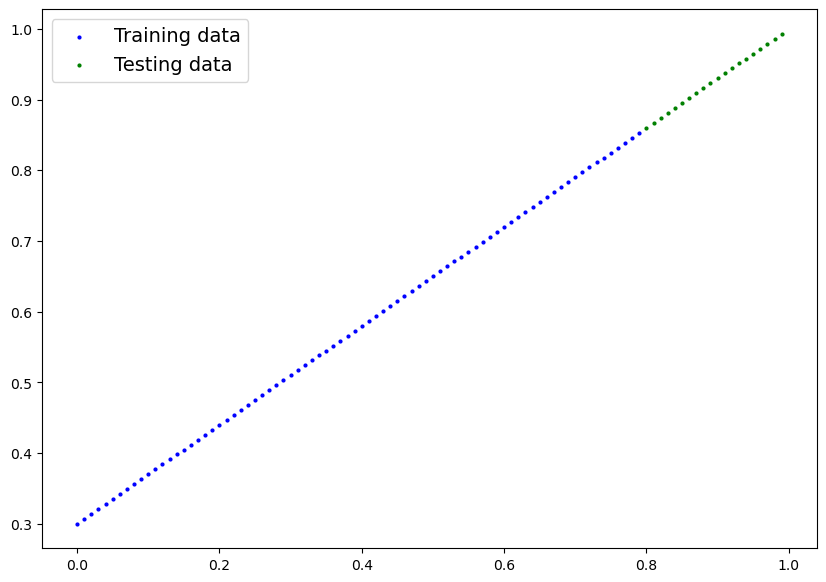

In [50]:
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression, test_data=X_test_regression,test_labels=y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line


In [51]:
# same architecture as model_1 (but using nn.Sequential())

model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [52]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer=torch.optim.SGD(model_2.parameters(),lr=0.01)


In [53]:
# Train the model
torch.manual_seed(42)
torch.backends.mps.torch.manual_seed(42)

epochs = 1000

X_train_regression,y_train_regression = X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression = X_test_regression.to(device),y_test_regression.to(device)

for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred,y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred,y_test_regression)

    if epoch % 100 == 0:
        print(f"Epoch:{epoch} | loss:{loss:.5f} | Test loss:{test_loss:.5f} ")

Epoch:0 | loss:0.75986 | Test loss:0.91103 
Epoch:100 | loss:0.02858 | Test loss:0.00081 
Epoch:200 | loss:0.02533 | Test loss:0.00209 
Epoch:300 | loss:0.02137 | Test loss:0.00305 
Epoch:400 | loss:0.01964 | Test loss:0.00341 
Epoch:500 | loss:0.01940 | Test loss:0.00387 
Epoch:600 | loss:0.01903 | Test loss:0.00379 
Epoch:700 | loss:0.01878 | Test loss:0.00381 
Epoch:800 | loss:0.01840 | Test loss:0.00329 
Epoch:900 | loss:0.01798 | Test loss:0.00360 


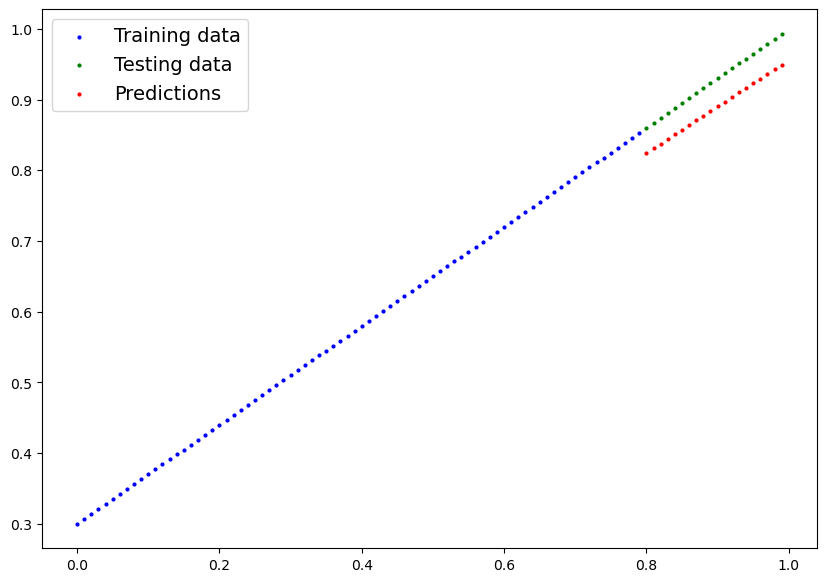

In [54]:
# Turn on evaluation mode
model_2.eval()

# make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),train_labels=y_train_regression.cpu(),test_data=X_test_regression.cpu(),test_labels=y_test_regression.cpu(), predictions = y_preds.cpu())

## 6. The missing piece: non-linearity

"what patterns could your draw if you were given an infinite amount of a straight and non-straight line"

or in machine learning terms, an inifite(but really it is finite) of linear and non-linear functions

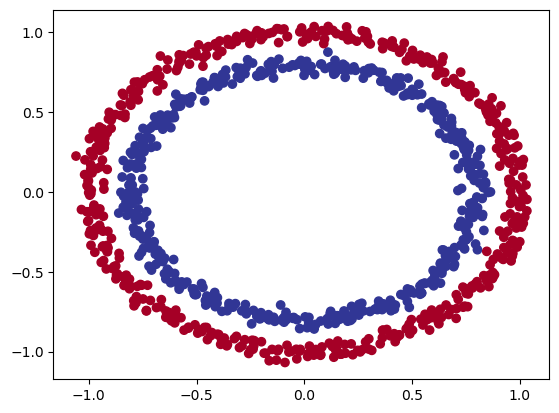

In [55]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, noise=0.03 , random_state=42)

plt.scatter(X[:,0], X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [56]:
# Convert data to tensors and then to train and test split
import torch
from sklearn.model_selection import  train_test_split


# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


# split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.02,random_state=42)

X_train[:5],y_train[:5]

(tensor([[ 0.0124,  0.9871],
         [ 1.0091, -0.2197],
         [-0.6679,  0.4286],
         [-0.8440,  0.6172],
         [ 0.6368,  0.7459]]),
 tensor([0., 0., 1., 0., 0.]))

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([980, 2])
torch.Size([980])
torch.Size([20, 2])
torch.Size([20])


### 6.2 Building a model with non-linearity
* Linear = staright linear
* Non-Linear = non-staright lines

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

In [58]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=10)
        self.layer_2 = nn.Linear(in_features=10,out_features=10)
        self.layer_3 = nn.Linear(in_features=10,out_features=1)
        self.relu = nn.ReLU() # relu is non-linear activation functions


    def forward(self,x):
        # where should we put our non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [59]:
## setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),lr=0.1)

# BInary classification exapmles
### spam or not spam
### credit card = fraud or not fraud
### insurance claims = at fault or not fault

# Training a model with non-linearity

In [60]:
# random seeds
torch.manual_seed(42)
torch.backends.mps.torch.manual_seed(42)

# Put all data on target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

# loop through data
epoch = 1000

for epoch in range(epochs):
    # Training
    model_3.train()

    # Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits => prediction probabilities => prediction labels


    # Calculate the loss
    loss = loss_fn(y_logits,y_train) # BCEWithLogitsLoss( takes in logits as first input)
    acc = accuracy_fn(y_true = y_train,y_pred = y_pred)

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward
    loss.backward()

    # step the optimizer
    optimizer.step()

    # Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # print out what's this happenin`
    if epoch % 100 == 0:
        print(f"Epoch:{epoch} | Loss:{loss  :.4f}, Acc:{acc:.2f} | test_loss:{test_loss:.4f}, test_acc:{test_acc:.2f}% ")


Epoch:0 | Loss:0.6930, Acc:50.00 | test_loss:0.6932, test_acc:50.00% 
Epoch:100 | Loss:0.6911, Acc:52.76 | test_loss:0.6894, test_acc:60.00% 
Epoch:200 | Loss:0.6897, Acc:54.80 | test_loss:0.6864, test_acc:65.00% 
Epoch:300 | Loss:0.6878, Acc:52.96 | test_loss:0.6824, test_acc:65.00% 
Epoch:400 | Loss:0.6849, Acc:52.86 | test_loss:0.6775, test_acc:65.00% 
Epoch:500 | Loss:0.6805, Acc:53.37 | test_loss:0.6711, test_acc:65.00% 
Epoch:600 | Loss:0.6742, Acc:54.08 | test_loss:0.6632, test_acc:65.00% 
Epoch:700 | Loss:0.6645, Acc:57.86 | test_loss:0.6533, test_acc:60.00% 
Epoch:800 | Loss:0.6493, Acc:66.22 | test_loss:0.6411, test_acc:65.00% 
Epoch:900 | Loss:0.6210, Acc:73.47 | test_loss:0.6163, test_acc:75.00% 


# Evaluating a model trained with non-linear models

In [62]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='mps:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='mps:0'))

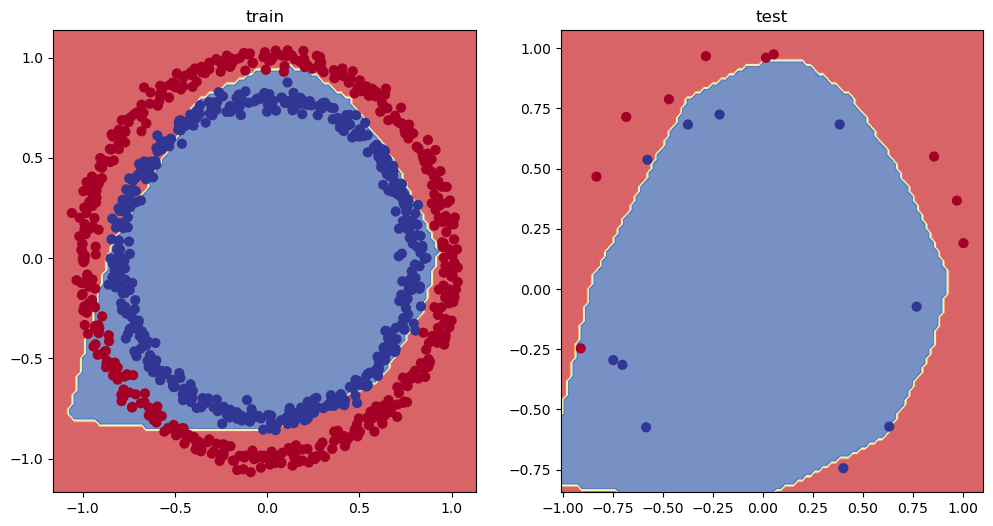

In [64]:
# plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)

## Challenge:** Can you improve model_3 to do better than 80% accuracy on the test data

## 7. Replicating non-linear activation functions

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tires to figure out the patterns on its own.

And these tools are lienar & non-linear functions.



In [67]:
# Create a tensor
A = torch.arange(-10,10,1, dtype=torch.float32)
A.dtype

torch.float32

In [68]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

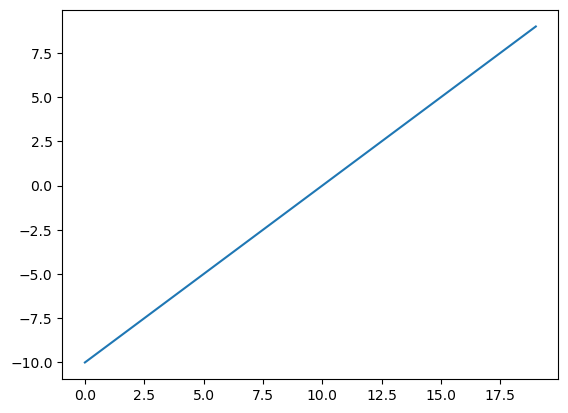

In [69]:
# Visualize
plt.plot(A)

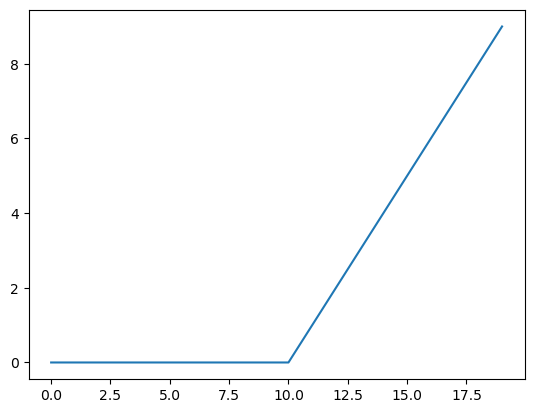

In [70]:
plt.plot(torch.relu(A))

In [71]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0),x) # input must be tensor

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

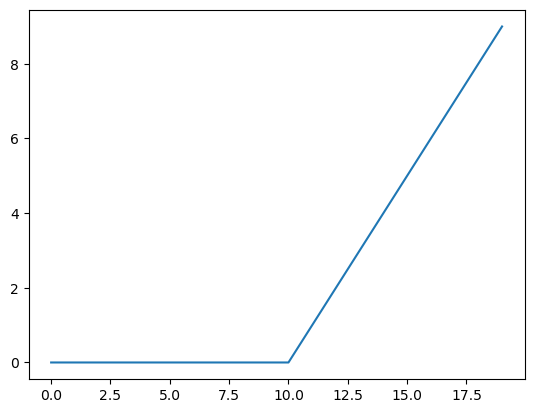

In [73]:
# Plot ReLU activation functions
plt.plot(relu(A))

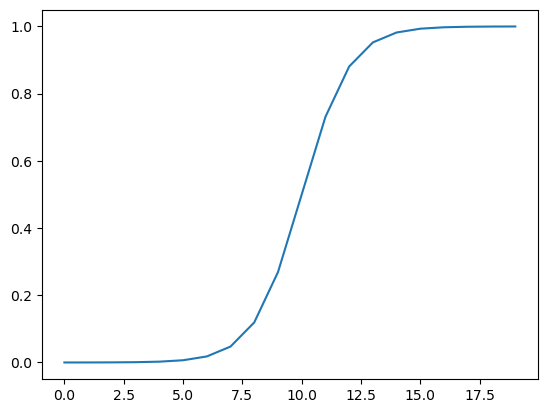

In [74]:
# Now let's do the same for sigmoid
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))
plt.plot(torch.sigmoid(A))